<a href="https://colab.research.google.com/github/AnaCristina1972/projett/blob/master/Aula2_RedesNeurais_keras_aula_Classificac%CC%A7a%CC%83o1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais com Keras

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [2]:
def plotimages(imgs, n_row = 1, n_col = 5, cmap='gray', titles = None):
    _, axs = plt.subplots(n_row, n_col, figsize=(12, 6))
    axs = axs.flatten()
    for i, (img, ax) in enumerate(zip(imgs, axs)):
        if titles is not None:
            ax.set_title(titles[i])
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
    plt.show()

## Dataset

Como base de dados, vamos usar a coleção fashion_mnist, fornecida com o keras:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape, X_train_full.dtype

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), dtype('uint8'))

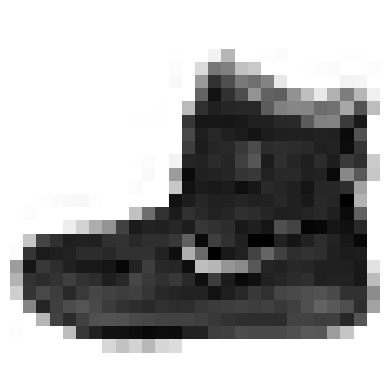

In [4]:
plt.imshow(X_train_full[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Este é um problema de classificação. Os rótulos originais são de 0 a 9:

In [6]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Os nomes correspondentes das classes em termos de peças de vestuário:

In [7]:
class_names = ["Camisetas/tops", "Calças", "Pulôver", "Vestido", "Casaco",
               "Sandália", "Camisa", "Tênis", "Bolsa", "Meia bota"]

Portanto, a primeira imagem das base de treino é Meia bota

In [8]:
class_names[y_train_full[0]]

'Meia bota'

Vamos dividir a base de treinamento para criar a base de validação.

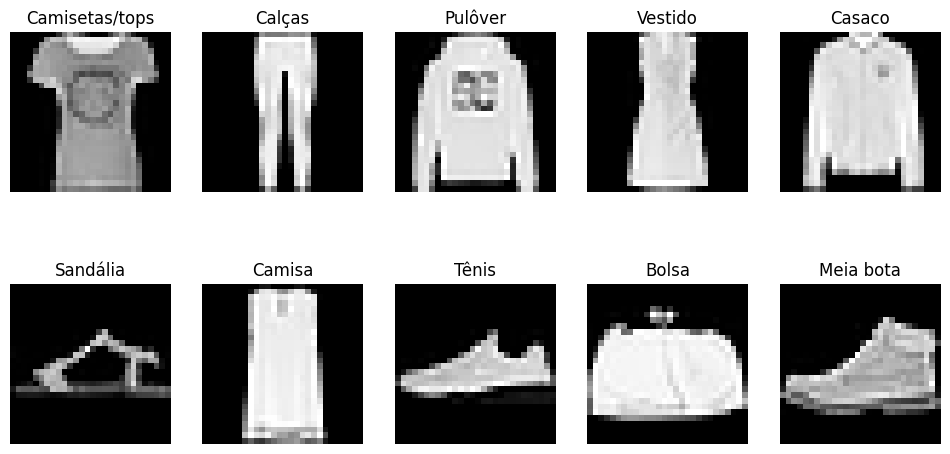

In [9]:
sample = [X_train_full[y_train_full==c][np.random.randint(0,100)] for c in range(len(class_names))]
plotimages(sample, n_row=2, titles = class_names)

Para trabalhar com redes neurais presisamos de 3 bases, treino, teste e validação

In [10]:
X_valid = X_train_full[:5000]
X_train = X_train_full[5000:]

X_train = (X_train - X_train.mean()) / X_train.std() # Normalização dos dados . Isso é o desvio padrão X_train.std()
X_valid = (X_valid - X_valid.mean()) / X_valid.std()

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
X_train[0]

array([[-0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.79940127,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365],
       [-0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.32156893,  0.60075862,  1.21193953,  1.24527667,
         0.97857955,  0.52297196, -0.19933275, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365],
       [-0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.81051365,
        -0.81051365, -0.81051365, -0.81051365, -0.81051365, -0.34379369,
         1.38973761,  1.9786

In [12]:
X_train.shape

(55000, 28, 28)

In [13]:
X_valid.shape

(5000, 28, 28)

## Uma rede Neural com Keras

#### Estilos, treino, teste e avaliação

O Keras possui três estilos de descrição de uma rede neural: (1) sequêncial, (2) funcional e (3) orientado a objetos (sub-classing). Vamos ver exemplos destas formas:

In [ ]:
# um modelo sequencial
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # O flatten vetoriza a imagem
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Outra forma de mostrar o modelo da arquitetura.

In [ ]:
tf.keras.utils.plot_model(model, "meu_primeiro_modelo.png", show_shapes=True)

In [ ]:
# um modelo funcional
model_input = keras.layers.Input(shape=(28, 28), name="images")
X = keras.layers.Flatten(name="input")(model_input)
X = keras.layers.Dense(300, activation="relu", name="h1")(X)
X = keras.layers.Dense(150, activation="relu", name="h2")(X)
X = keras.layers.Dense(100, activation="relu", name="h3")(X)
X = keras.layers.Dense(50, activation="relu", name="h4")(X)
yhat = keras.layers.Dense(10, activation="softmax", name="output")(X)

model = keras.models.Model(inputs=[model_input], outputs=[yhat])

In [ ]:
model.summary()

In [ ]:
# um modelo com subclassing
class SeqModel(keras.models.Model):
    def __init__(self, **kwargs):
        # call the parent constructor
        super(SeqModel, self).__init__(**kwargs)
        # initialize the layers
        self.input_layer = keras.layers.Flatten(name="input_layer")
        self.h1 = keras.layers.Dense(300, activation="relu", name="h1")
        self.h2 = keras.layers.Dense(150, activation="relu", name="h2")
        self.h3 = keras.layers.Dense(100, activation="relu", name="h3")
        self.h4 = keras.layers.Dense(50, activation="relu", name="h4")
        self.out_layer = keras.layers.Dense(10, activation="softmax", name="out_layer")

    def call(self, inputs):
        x = self.input_layer(inputs)
        x = self.h1(x)
        x = self.h2(x)
        x = self.h3(x)
        x = self.h4(x)
        x = self.out_layer(x)
        return x

model = SeqModel()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20, batch_size = 100,
                    validation_data=(X_valid, y_valid))# batch_size e o minilote

A seguir, temos um resumo do modelo, que nos ajuda a entender sua complexidade: mais de 300 mil parâmetros!

In [ ]:
model.summary()

Note que o log do treino guarda informação sobre todas as métricas avaliadas ao longo das épocas, como um dicionário Python:

In [ ]:
history.history

Isso nos permite facilmente avaliar estes números, com ajuda do Pandas:

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Para avaliar o modelo, podemos usar evalute:

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_test.shape

# **Parada antecipada**

Uma das estratégias mais comuns para se evitar overfitting é parar o treino quando o resultado na coleção de validação já não melhora mais. Isto é comumente chamado de parada antecipada e é implementado no Keras pelo callback `EarlyStopping`:

In [ ]:
#Chamando um callback do Keras
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss", # pare se val_loss não está mais melhorando
        min_delta=1e-2, # considere que não está mais melhorando se diferença para 0 é maior que 1e-2
        patience=5, # número de épocas sem melhoria que devem ser observadas
        verbose=1,
    )
]

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20, callbacks = callbacks, batch_size = 100,
                    validation_data=(X_valid, y_valid))

Isso nos permite facilmente avaliar estes números, com ajuda do Pandas:

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Para avaliar o modelo, podemos usar evalute:

In [ ]:
model.evaluate(X_test, y_test)